In [2]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t as time

import numpy as np
import matplotlib.pyplot as plt

import sys, os

import moyra as ma
import moyra.elements as ele
import moyra.forces as ef

me.mechanics_printing()

#### Create Symbols

In [55]:
from sympy.abc import x,y
DoFs = 2          # total degrees of freedom

p = ma.DynamicModelParameters(DoFs)
p.L = ma.ModelSymbol(string = 'L')
p.m = ma.ModelSymbol(string = 'm')
p.Fx = ma.ModelSymbol(string = 'Fx')
p.Fy = ma.ModelSymbol(string = 'Fy')
p.Fz = ma.ModelSymbol(string = 'Fz')
p.K = ma.ModelSymbol(string = 'K')

# Attitude Parmas
p.rho = ma.ModelSymbol(value = 1.225,string = 'rho')                 # density
p.V = ma.ModelSymbol(value = 10,string = 'V')                        # velocity
p.g  = ma.ModelSymbol(value = 9.81,string = 'g')                     # gravity


#### Create Coordinate Systems

In [65]:
tether_frame = ma.HomogenousTransform().R_z(p.q[0]).R_x(p.q[1]).Translate(0,0,-p.L)

#Generate Mass Matrices
# M = ele.MassMatrix(p.m, I_xx = p.I_xx, I_yy=p.I_yy, I_zz=p.I_zz)
M = ele.MassMatrix(p.m, I_xx = 0, I_yy=0, I_zz=0)

# Generate Rigid Elements
aircraft_mass = ele.RigidElement(tether_frame,M,gravityPotential=True)
#tether_spring = ele.Spring(p.q[2],p.K)

# Generate Aircraft Forces
aircraft_forces = ef.BodyForce(p,tether_frame,Fx=p.Fx,Fy=p.Fy,Fz=p.Fz)

In [66]:
sm = ma.SymbolicModel.FromElementsAndForces(p,[aircraft_mass],ExtForces=aircraft_forces)

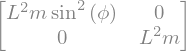

In [67]:
sm.M.subs({p.q[0]:psi,p.q[1]:phi})

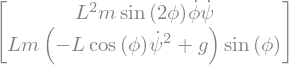

In [68]:
psi = me.dynamicsymbols('psi')
phi = me.dynamicsymbols('phi')
sym.simplify(sm.f).subs({p.q[0]:psi,p.q[1]:phi})

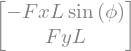

In [69]:
sm.ExtForces.Q().subs({p.q[0]:psi,p.q[1]:phi})

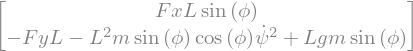

In [70]:
A = (sm.M*p.qdd+sm.f-sm.ExtForces.Q()).subs({**{i:0 for i in p.qdd},p.qd[1]:0})
A.subs({p.q[0]:psi,p.q[1]:phi})

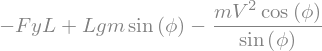

In [32]:
V = sym.Symbol('V')
A_new = me.msubs(A[1],{p.qd[0]:V/(p.L*sym.sin(p.q[1]))})
A_new.subs({p.q[0]:psi,p.q[1]:phi})

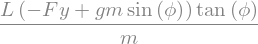

In [38]:
V_2 = sym.solve(A_new,V**2)[0]
V_2.subs({p.q[0]:psi,p.q[1]:phi})

In [77]:
V_body = sym.simplify(tether_frame.Translate(x,y,0).BodyVelocity())

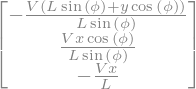

In [87]:
V_body = sym.Matrix(V_body[0:3])
V_body = me.msubs(V_body,{p.qd[0]:V/(p.L*sym.sin(p.q[1])),p.qd[1]:0})
V_body.subs({p.q[0]:psi,p.q[1]:phi})

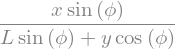

In [92]:
sym.simplify(V_body[2]/V_body[0]).subs({p.q[0]:psi,p.q[1]:phi})

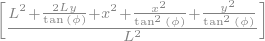

In [95]:
sym.simplify(V_body.T*V_body/V**2).subs({p.q[0]:psi,p.q[1]:phi})